# Regression [House Price] Problem

**Intution behind using kmeans clustering**

***In this notebook dimension reduction using kmeans clustering is used , which is an unsupervised learning algorithm. Instead of feature selection or feature engineering , I have reduced the dimension by grouping or clustering most of the similar features together and they are categorized or labeled accordingly, making the preprocessing more sharper.***

In [1]:
%pip install scikit-learn --upgrade

%pip install skimpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-cloud-bigquery 2.34.4 which is incompatible.
bigframes 0.22.0 requires google-cloud-storage>=2.0.0, but you have google-cloud-storage 1.44.0 which is incompatible.
bigframes 0.22.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.3 which is incompatible.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.
Note:

In [2]:
import sklearn , skimpy 
sklearn.__version__  

'1.5.2'

In [3]:
import numpy as np # linear algebra
import pandas as pd
import polars as pl 

from sklearn.preprocessing import StandardScaler , OrdinalEncoder 
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import make_column_transformer

import matplotlib.pyplot as plt 
import seaborn as sns 

import skimpy 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
train = pl.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv' , infer_schema_length=10000)

test = pl.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv' , infer_schema_length=10000)

In [5]:
skimpy.skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1460   │ │ string      │ 46    │                                                          │
│ │ Number of columns │ 81     │ │ int64       │ 35    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0     ┃ p25     ┃ p50     ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Id              │   0 │     0 │    730.5 │   421.6 │      1 │   365.8 │   730.5 │   1095 │   1460 │ ▇▇▇▇▇▇ │  │
│ │ MSSubClass      │   0 │     0 │     56.9 │    42.3 │     20 │      20 │      50 │     70 │    190 │ ▇▇▂▁▁▁ │  │
│ │ LotArea         │   0 │     0 │    10520 │    9981 │   1300 │    7554 │    9478 │  11600 │ 215200 │   ▇    │  │
│ │ OverallQual     │   0 │     0 │    6.099 │   1.383 │      1 │       5 │       6 │      7 │     10 │   ▇▆▇▁ │  │
│ │ OverallCond     │   0 │     0 │    5.575 │   1.113 │      1 │       5 │       5 │      6 │      9 │    ▇▂▁ │  │
│ │ YearBuilt       │   0 │     0 │     1971 │    30.2 │   1872 │    1954 │    1973 │   2000 │   2010 │  ▁▃▅▅▇ │  │
│ │ YearRemodAdd    │   0 │     0 │     1985 │   20.65 │   1950 │    1967 │    1994 │   2004 │   2010 │ ▃▂▃▁▃▇ │  │
│ │ BsmtFinSF1      │   0 │     0 │    443.6 │   456.1 │      0 │       0 │   383.5 │  712.2 │   5644 │   ▇▁   │  │
│ │ BsmtFinSF2      │   0 │     0 │    46.55 │   161.3 │      0 │       0 │       0 │      0 │   1474 │   ▇    │  │
│ │ BsmtUnfSF       │   0 │     0 │    567.2 │   441.9 │      0 │     223 │   477.5 │    808 │   2336 │ ▇▆▃▁▁  │  │
│ │ TotalBsmtSF     │   0 │     0 │     1057 │   438.7 │      0 │   795.8 │   991.5 │   1298 │   6110 │   ▇▇   │  │
│ │ 1stFlrSF        │   0 │     0 │     1163 │   386.6 │    334 │     882 │    1087 │   1391 │   4692 │  ▇▇▁   │  │
│ │ 2ndFlrSF        │   0 │     0 │      347 │   436.5 │      0 │       0 │       0 │    728 │   2065 │  ▇▂▃▁  │  │
│ │ LowQualFinSF    │   0 │     0 │    5.845 │   48.62 │      0 │       0 │       0 │      0 │    572 │   ▇    │  │
│ │ GrLivArea       │   0 │     0 │     1515 │   525.5 │    334 │    1130 │    1464 │   1777 │   5642 │  ▅▇▁   │  │
│ │ BsmtFullBath    │   0 │     0 │   0.4253 │  0.5189 │      0 │       0 │       0 │      1 │      3 │  ▇ ▅   │  │
│ │ BsmtHalfBath    │   0 │     0 │  0.05753 │  0.2388 │      0 │       0 │       0 │      0 │      2 │   ▇    │  │
│ │ FullBath        │   0 │     0 │    1.565 │  0.5509 │      0 │       1 │       2 │      2 │      3 │   ▇ ▇  │  │
│ │ HalfBath        │   0 │     0 │   0.3829 │  0.5029 │      0 │       0 │       0 │      1 │      2 │  ▇  ▅  │  │
│ │ BedroomAbvGr    │   0 │     0 │    2.866 │  0.8158 │      0 │       2 │       3 │      3 │      8 │  ▁▃▇▂  │  │
│ │ KitchenAbvGr    │   0 │     0 │    1.047 │  0.2203 │      0 │       1 │       1 │      1 │      3 │    ▇   │  │
│ │ TotRmsAbvGrd    │   0 │     0 │    6.518 │   1.625 │      2 │       5 │       6 │      7 │     14 │  ▅▇▃▁  │  │
│ │ Fireplaces      │   0 │     0 │    0.613 │  0.6447 │

In [6]:
skimpy.skim(test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1459   │ │ string      │ 54    │                                                          │
│ │ Number of columns │ 80     │ │ int64       │ 26    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50   ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Id               │   0 │      0 │     2190 │    421.3 │  1461 │   1826 │  2190 │   2554 │   2919 │ ▇▇▇▇▇▇  │  │
│ │ MSSubClass       │   0 │      0 │    57.38 │    42.75 │    20 │     20 │    50 │     70 │    190 │  ▇▆▂▁▁  │  │
│ │ LotArea          │   0 │      0 │     9819 │     4956 │  1470 │   7391 │  9399 │  11520 │  56600 │   ▇▃    │  │
│ │ OverallQual      │   0 │      0 │    6.079 │    1.437 │     1 │      5 │     6 │      7 │     10 │   ▇▅▇▁  │  │
│ │ OverallCond      │   0 │      0 │    5.554 │    1.114 │     1 │      5 │     5 │      6 │      9 │    ▇▁▁  │  │
│ │ YearBuilt        │   0 │      0 │     1971 │    30.39 │  1879 │   1953 │  1973 │   2001 │   2010 │  ▁▂▅▃▇  │  │
│ │ YearRemodAdd     │   0 │      0 │     1984 │    21.13 │  1950 │   1963 │  1992 │   2004 │   2010 │ ▅▂▂▁▃▇  │  │
│ │ 1stFlrSF         │   0 │      0 │     1157 │    398.2 │   407 │  873.5 │  1079 │   1382 │   5095 │   ▇▅    │  │
│ │ 2ndFlrSF         │   0 │      0 │      326 │    420.6 │     0 │      0 │     0 │    676 │   1862 │  ▇▂▃▁   │  │
│ │ LowQualFinSF     │   0 │      0 │    3.544 │    44.04 │     0 │      0 │     0 │      0 │   1064 │    ▇    │  │
│ │ GrLivArea        │   0 │      0 │     1486 │    485.6 │   407 │   1118 │  1432 │   1721 │   5095 │   ▅▇▂   │  │
│ │ FullBath         │   0 │      0 │    1.571 │   0.5552 │     0 │      1 │     2 │      2 │      4 │   ▇ ▇   │  │
│ │ HalfBath         │   0 │      0 │   0.3777 │    0.503 │     0 │      0 │     0 │      1 │      2 │  ▇  ▅   │  │
│ │ BedroomAbvGr     │   0 │      0 │    2.854 │   0.8298 │     0 │      2 │     3 │      3 │      6 │   ▁▃▇▂  │  │
│ │ KitchenAbvGr     │   0 │      0 │    1.042 │   0.2085 │     0 │      1 │     1 │      1 │      2 │     ▇   │  │
│ │ TotRmsAbvGrd     │   0 │      0 │    6.385 │    1.509 │     3 │      5 │     6 │      7 │     15 │  ▁▇▅▁   │  │
│ │ Fireplaces       │   0 │      0 │   0.5812 │   0.6474 │     0 │      0 │     0 │      1 │      4 │  ▇▇ ▁   │  │
│ │ WoodDeckSF       │   0 │      0 │    93.17 │    127.7 │     0 │      0 │     0 │    168 │   1424 │   ▇▁    │  │
│ │ OpenPorchSF      │   0 │      0 │    48.31 │    68.88 │     0 │      0 │    28 │     72 │    742 │   ▇▁    │  │
│ │ EnclosedPorch    │   0 │      0 │    24.24 │    67.23 │     0 │      0 │     0 │      0 │   1012 │    ▇    │  │
│ │ 3SsnPorch        │   0 │      0 │    1.794 │    20.21 │     0 │      0 │     0 │      0 │    360 │    ▇    │  │
│ │ ScreenPorch      │   0 │      0 │    17.06 │    56.61 │     0 │      0 │     0 │      0 │    576 │    ▇    │  │
│ │ PoolArea         │   0 │      0 │    1.744 │    30.4

In [7]:
id_train = train['Id']
train = train.drop('Id')

id_test = test['Id']
test = test.drop('Id')

In [8]:
col_name_tr=train.columns 

cate_cols = train.select(pl.col(pl.String)).columns

In [9]:
transformer1 = make_column_transformer(
        (OrdinalEncoder(), cate_cols),
        remainder='passthrough'
)

transformer1.set_output(transform="polars")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['MSZoning', 'LotFrontage', 'Street', 'Alley',
                                  'LotShape', 'LandContour', 'Utilities',
                                  'LotConfig', 'LandSlope', 'Neighborhood',
                                  'Condition1', 'Condition2', 'BldgType',
                                  'HouseStyle', 'RoofStyle', 'RoofMatl',
                                  'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                  'MasVnrArea', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC', ...])])

In [10]:
train_df = transformer1.fit_transform(train)
train_df.columns = col_name_tr

In [11]:
col_name_test=test.columns 

cate_cols_test = test.select(pl.col(pl.String)).columns

In [12]:
transformer2 = make_column_transformer(
        (OrdinalEncoder(), cate_cols_test),
        remainder='passthrough'
)

transformer2.set_output(transform="polars")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['MSZoning', 'LotFrontage', 'Street', 'Alley',
                                  'LotShape', 'LandContour', 'Utilities',
                                  'LotConfig', 'LandSlope', 'Neighborhood',
                                  'Condition1', 'Condition2', 'BldgType',
                                  'HouseStyle', 'RoofStyle', 'RoofMatl',
                                  'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                  'MasVnrArea', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
                                  'BsmtFinType2', 'BsmtFinSF2', ...])])

In [13]:
test_df = transformer2.fit_transform(test)
test_df.columns = col_name_test

In [14]:
skimpy.skim(train_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1460   │ │ float64     │ 46    │                                                          │
│ │ Number of columns │ 80     │ │ int64       │ 34    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %  ┃ mean       ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ MSSubClass     │   0 │     0 │      3.029 │    0.632 │      0 │      3 │      3 │      3 │      4 │     ▇▂ │  │
│ │ MSZoning       │   0 │     0 │      77.47 │    26.24 │      0 │     65 │     80 │     96 │    110 │ ▁ ▂▆▇▇ │  │
│ │ LotFrontage    │   0 │     0 │     0.9959 │    0.064 │      0 │      1 │      1 │      1 │      1 │      ▇ │  │
│ │ LotArea        │   0 │     0 │     0.9938 │   0.2497 │      0 │      1 │      1 │      1 │      2 │     ▇  │  │
│ │ Street         │   0 │     0 │      1.942 │    1.409 │      0 │      0 │      3 │      3 │      3 │ ▅    ▇ │  │
│ │ Alley          │   0 │     0 │      2.777 │   0.7077 │      0 │      3 │      3 │      3 │      3 │      ▇ │  │
│ │ LotShape       │   0 │     0 │  0.0006849 │  0.02617 │      0 │      0 │      0 │      0 │      1 │   ▇    │  │
│ │ LandContour    │   0 │     0 │      3.019 │    1.623 │      0 │      2 │      4 │      4 │      4 │ ▂▁   ▇ │  │
│ │ Utilities      │   0 │     0 │    0.06233 │   0.2762 │      0 │      0 │      0 │      0 │      2 │   ▇    │  │
│ │ LotConfig      │   0 │     0 │      12.25 │    6.014 │      0 │      7 │     12 │     17 │     24 │ ▂▇▅▇▇▅ │  │
│ │ LandSlope      │   0 │     0 │      2.032 │   0.8685 │      0 │      2 │      2 │      2 │      8 │   ▁▇   │  │
│ │ Neighborhood   │   0 │     0 │      2.008 │    0.259 │      0 │      2 │      2 │      2 │      7 │    ▇   │  │
│ │ Condition1     │   0 │     0 │     0.4932 │    1.198 │      0 │      0 │      0 │      0 │      4 │ ▇    ▁ │  │
│ │ Condition2     │   0 │     0 │      3.038 │    1.911 │      0 │      2 │      2 │      5 │      7 │ ▂▇  ▅▁ │  │
│ │ BldgType       │   0 │     0 │       1.41 │    0.835 │      0 │      1 │      1 │      1 │      5 │   ▇ ▂  │  │
│ │ HouseStyle     │   0 │     0 │      1.075 │   0.5991 │      0 │      1 │      1 │      1 │      7 │   ▇    │  │
│ │ OverallQual    │   0 │     0 │      9.625 │    3.198 │      0 │      8 │     12 │     12 │     14 │  ▁▃▃ ▇ │  │
│ │ OverallCond    │   0 │     0 │      10.34 │    3.541 │      0 │      8 │     13 │     13 │     15 │   ▃▂▂▇ │  │
│ │ YearBuilt      │   0 │     0 │      2.442 │    1.046 │      0 │      1 │      3 │      3 │      4 │  ▅  ▇▁ │  │
│ │ YearRemodAdd   │   0 │     0 │      62.42 │    97.37 │      0 │      0 │      0 │    105 │    327 │ ▇▁▁▁▁▁ │  │
│ │ RoofStyle      │   0 │     0 │       2.54 │    0.694 │      0 │      2 │      3 │      3 │      3 │     ▅▇ │  │
│ │ RoofMatl       │   0 │     0 │      3.734 │   0.7318 │      0 │      4 │      4 │      4 │      4 │    ▁ ▇ │  │
│ │ Exterior1st    │   0 │     0 │      1.397 │   0.7224

In [15]:
skimpy.skim(test_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1459   │ │ float64     │ 54    │                                                          │
│ │ Number of columns │ 79     │ │ int64       │ 25    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean       ┃ sd        ┃ p0    ┃ p25    ┃ p50   ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ MSSubClass       │   0 │     0 │       3.96 │    0.8965 │     0 │      4 │     4 │      4 │     5 │  ▁  ▇▂ │  │
│ │ MSZoning         │   0 │     0 │      80.54 │     26.93 │     0 │   68.5 │    83 │     99 │   115 │ ▁ ▂▆▇▇ │  │
│ │ LotFrontage      │   0 │     0 │     0.9959 │   0.06402 │     0 │      1 │     1 │      1 │     1 │      ▇ │  │
│ │ LotArea          │   0 │     0 │     0.9774 │      0.27 │     0 │      1 │     1 │      1 │     2 │     ▇  │  │
│ │ Street           │   0 │     0 │      1.953 │     1.411 │     0 │      0 │     3 │      3 │     3 │ ▅    ▇ │  │
│ │ Alley            │   0 │     0 │      2.777 │    0.7013 │     0 │      3 │     3 │      3 │     3 │      ▇ │  │
│ │ LotShape         │   0 │     0 │   0.001371 │   0.03701 │     0 │      0 │     0 │      0 │     1 │   ▇    │  │
│ │ LandContour      │   0 │     0 │      3.093 │     1.586 │     0 │      2 │     4 │      4 │     4 │ ▂▁   ▇ │  │
│ │ Utilities        │   0 │     0 │    0.04524 │    0.2176 │     0 │      0 │     0 │      0 │     2 │   ▇    │  │
│ │ LotConfig        │   0 │     0 │      12.62 │     5.898 │     0 │      8 │    12 │     17 │    24 │ ▂▇▆▇▇▆ │  │
│ │ LandSlope        │   0 │     0 │      2.049 │    0.8798 │     0 │      2 │     2 │      2 │     8 │   ▁▇   │  │
│ │ Neighborhood     │   0 │     0 │      1.996 │    0.1434 │     0 │      2 │     2 │      2 │     4 │     ▇  │  │
│ │ Condition1       │   0 │     0 │     0.5182 │     1.215 │     0 │      0 │     0 │      0 │     4 │ ▇    ▁ │  │
│ │ Condition2       │   0 │     0 │      2.639 │      1.48 │     0 │      2 │     2 │      4 │     6 │ ▂ ▇ ▅▁ │  │
│ │ BldgType         │   0 │     0 │      1.382 │    0.8066 │     0 │      1 │     1 │      1 │     5 │   ▇ ▂  │  │
│ │ HouseStyle       │   0 │     0 │    0.01576 │    0.1585 │     0 │      0 │     0 │      0 │     3 │   ▇    │  │
│ │ OverallQual      │   0 │     0 │       8.94 │     2.854 │     0 │      7 │    11 │     11 │    13 │   ▃▂▁▇ │  │
│ │ OverallCond      │   0 │     0 │      10.33 │     3.562 │     0 │      8 │    13 │     13 │    15 │   ▃▃▂▇ │  │
│ │ YearBuilt        │   0 │     0 │      2.456 │     1.025 │     0 │      1 │     3 │      3 │     4 │  ▃  ▇▁ │  │
│ │ YearRemodAdd     │   0 │     0 │      56.36 │     89.16 │     0 │      0 │     0 │   89.5 │   303 │ ▇▁▁▁▁▁ │  │
│ │ RoofStyle        │   0 │     0 │      2.522 │    0.7105 │     0 │      2 │     3 │      3 │     3 │     ▅▇ │  │
│ │ RoofMatl         │   0 │     0 │      3.684 │    0.8129 │     0 │      4 │     4 │      4 │     4 │    ▁ ▇ │  │
│ │ Exterior1st      │   0 │     0 │       1.39 │    0.7

### Selecting the subset to be reduced form the dataframe

*The result depends on 'part' parameter here , the initial dataset has around 80 features(columns) , so I take a chunck of those features and group the data points in clusters which will serve as a catagory or label, here the 'part' is no. of feature wrt to which I'll cluster.*

In [16]:
part = 35
fet_col =train_df.columns[:part]

In [17]:
train_km = train_df.select(pl.col(fet_col)) 


test_km = test_df.select(pl.col(fet_col))

### Elbow Method to find optimal K(no. of clusters)

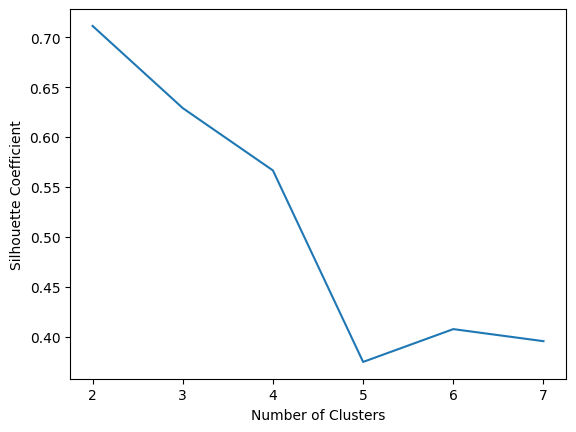

In [18]:
silhouette_coefficients = [] 

kmeans_params = {
              "init":"k-means++",
              "n_init":30,
              "max_iter":300,
              "random_state":42
                }

kmin = 2 
kmax = 8

for k in range(kmin, kmax):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(train_km)
    score = silhouette_score(train_km, kmeans.labels_)
    silhouette_coefficients.append((score))  ## How close the sample is to the centroid

plt.plot(range(kmin, kmax), silhouette_coefficients)
plt.xticks(range(kmin, kmax))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [19]:
silhouette_coefficients 

[0.7113585569529841,
 0.6289853976337524,
 0.5665002037423731,
 0.3745847524490207,
 0.40746506460260434,
 0.3953720710713539]

### Reducing the dimension by fitting kmeans model with optimal k

In [20]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=np.argmax(silhouette_coefficients)+kmin,
    n_init=30,
    max_iter=300,
    random_state=42
)

kmeans.fit(train_km)

KMeans(n_clusters=2, n_init=30, random_state=42)

In [21]:
pred_km = kmeans.predict(test_km)

In [22]:
training = train_df.with_columns(pl.lit(kmeans.labels_).alias('reduced_features')).drop(train_df.columns[:part])

In [23]:
training

BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,reduced_features
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i32
1.0,89.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500,0
1.0,62.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500,0
1.0,87.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500,0
5.0,84.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000,0
1.0,86.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1.0,85.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,60,7917,6,5,1999,2000,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000,0
1.0,64.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,4.0,20,13175,6,6,1978,1988,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000,0
1.0,29.0,2.0,5.0,5.0,2.0,3.0,0.0,3.0,8.0,4.0,70,9042,7,9,1941,2006,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500,0


In [24]:
testing = test_df.with_columns(pl.lit(pred_km).alias('reduced_features')).drop(test_df.columns[:part])

In [25]:
testing

BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,reduced_features
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i32
3.0,0.0,0.0,4.0,7.0,3.0,1.0,46.0,3.0,1.0,367.0,4.0,5.0,2.0,2.0,2.0,1.0,9.0,4.0,20,11622,5,6,1961,1961,896,0,0,896,1,0,2,1,5,0,140,0,0,0,120,0,0,6,2010,0
3.0,0.0,0.0,2.0,7.0,3.0,1.0,43.0,3.0,1.0,86.0,4.0,5.0,2.0,2.0,4.0,0.0,9.0,4.0,20,14267,6,6,1958,1958,1329,0,0,1329,1,1,3,1,6,0,393,36,0,0,0,0,12500,6,2010,0
3.0,0.0,0.0,4.0,7.0,5.0,1.0,82.0,0.0,2.0,198.0,4.0,5.0,2.0,2.0,2.0,1.0,9.0,4.0,60,13830,5,5,1997,1998,928,701,0,1629,2,1,3,1,6,1,212,34,0,0,0,0,0,3,2010,0
3.0,0.0,0.0,2.0,7.0,2.0,1.0,83.0,0.0,2.0,187.0,4.0,5.0,2.0,2.0,4.0,1.0,9.0,4.0,60,9978,6,6,1998,1998,926,678,0,1604,2,1,3,1,7,1,360,36,0,0,0,0,0,6,2010,0
3.0,0.0,0.0,2.0,7.0,3.0,1.0,77.0,2.0,2.0,217.0,4.0,5.0,2.0,2.0,4.0,1.0,9.0,4.0,120,5005,8,5,1992,1992,1280,0,0,1280,2,0,2,1,5,0,0,82,0,0,144,0,0,1,2010,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3.0,0.0,0.0,4.0,7.0,3.0,6.0,97.0,1.0,0.0,0.0,2.0,3.0,2.0,2.0,4.0,1.0,9.0,4.0,160,1936,4,7,1970,1970,546,546,0,1092,1,1,3,1,5,0,0,0,0,0,0,0,0,6,2006,0
3.0,0.0,0.0,4.0,7.0,3.0,4.0,55.0,3.0,1.0,68.0,4.0,5.0,2.0,2.0,4.0,1.0,9.0,0.0,160,1894,4,5,1970,1970,546,546,0,1092,1,1,3,1,6,0,0,24,0,0,0,0,0,4,2006,0
3.0,1.0,0.0,4.0,7.0,5.0,5.0,45.0,3.0,2.0,272.0,4.0,5.0,2.0,2.0,4.0,1.0,9.0,0.0,20,20000,5,7,1960,1996,1224,0,0,1224,1,0,4,1,7,1,474,0,0,0,0,0,0,9,2006,0


In [26]:
def oversample_scale_and_split(train_df , target , test_df , oversample=False):
    y = train_df[target]
    x = StandardScaler().fit_transform(train_df.drop(target)) 
    if oversample :
          x , y = RandomOverSampler(random_state=42).fit_resample(x , y)
    xtest = StandardScaler().fit_transform(test_df)
    xtrain , xvalid, ytrain , yvalid = train_test_split(x , y , train_size=0.6 ,test_size=0.4 , random_state=42)
    return xtrain , xvalid , ytrain , yvalid , xtest

In [27]:
xtrain , xvalid , ytrain , yvalid , xtest = oversample_scale_and_split(training , 'SalePrice' , testing , oversample=False)

In [28]:
xtrain.shape , ytrain.shape , xvalid.shape , yvalid.shape , xtest.shape

((876, 45), (876,), (584, 45), (584,), (1459, 45))

__________________________________________________________________________________

### Using Xgboost to learn

In [29]:
import xgboost as xg 
xg.set_config(verbosity=1)

from sklearn.metrics import mean_squared_log_error

In [30]:
xgb_r = xg.XGBRegressor(objective="reg:squarederror",n_estimators = 870, seed = 42 , learning_rate=0.02 , eval_metric='rmsle' , max_depth=4) 

xgb_r.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=870, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
p_val = xgb_r.predict(xvalid)

In [32]:
p_val

array([138034.42 , 321540.28 , 129652.26 , 156699.39 , 315516.44 ,
        81570.14 , 225808.16 , 146608.67 ,  85189.36 , 132520.23 ,
       151822.66 , 122623.836, 113093.41 , 196122.73 , 167173.34 ,
       133006.34 , 191845.97 , 133534.8  , 115151.88 , 216742.11 ,
       176389.19 , 242097.88 , 175170.6  , 129720.25 , 202265.64 ,
       171849.14 , 195494.52 , 114503.664, 171529.94 , 199279.89 ,
       115178.7  , 263530.9  , 200884.97 , 113167.125, 272774.22 ,
       147306.05 , 143274.92 , 209680.33 , 340277.5  , 106374.99 ,
       132499.28 , 243139.67 , 117364.09 , 301678.28 , 123332.57 ,
       116625.88 , 116236.4  , 120171.445, 271772.75 , 140413.66 ,
       121914.62 , 177212.27 , 114553.59 , 346641.5  , 145143.12 ,
       253295.58 , 197805.42 , 140158.88 , 144430.67 , 114464.51 ,
        77277.6  , 160679.64 , 285343.   , 291525.53 , 296548.56 ,
       232200.98 , 113545.055, 318847.88 , 120065.484, 163536.12 ,
       119457.48 , 129797.51 , 111047.87 ,  92151.984, 442019.

In [33]:
xgb_r.score(xvalid , yvalid)

0.8901271224021912

In [34]:
RMSLE = np.sqrt(mean_squared_log_error(yvalid, p_val))
print("The score is %.5f" % RMSLE )

The score is 0.13559


In [35]:
p_test = xgb_r.predict(xtest)

In [36]:
p_test

array([121568.266, 147017.36 , 161216.64 , ..., 209313.67 , 146893.28 ,
       180438.36 ], dtype=float32)

In [37]:
sub_df = pl.DataFrame(
    {
        'Id' : id_test ,
        'SalePrice' : p_test
    }
)


In [38]:
sub_df

Id,SalePrice
i64,f32
1461,121568.265625
1462,147017.359375
1463,161216.640625
1464,181353.15625
1465,169325.59375
…,…
2915,111286.203125
2916,130614.109375
2917,209313.671875


In [39]:
sub_df.write_csv('submission.csv')

___________________________________________________________________________________________